In [30]:
import pickle
with open("merged_data.txt", "rb") as myfile:
    df = pickle.load(myfile)
print df.head()

   popularity               color info  revenue  editorial department_count  \
0    0.000576        [Black and White]        0                           0   
1    0.000343        [Black and White]        0                           0   
2    0.000213        [Black and White]        0                           0   
3    0.001449        [Black and White]        0                           0   
4    0.000162  [Color::(hand painted)]        0                           0   

   budget  production_companies_count  video  year  art department_count  \
0       0                           2  False  1939                     0   
1       0                           1  False  1940                     0   
2       0                           1  False  1941                     0   
3       0                           1  False  1894                     0   
4       0                           0  False  1892                     0   

       id         ...          release_date transportation departmen

In [11]:
from collections import Counter
print Counter(df['merge_genres'].apply(tuple))

Counter({(u'Drama',): 41286, (u'Comedy',): 27321, (u'Documentary',): 22308, (u'Horror',): 7198, (u'Animation',): 5238, ('Short',): 4671, (u'Action',): 4552, (u'Thriller',): 4193, (u'Drama', u'Comedy'): 4015, ('Drama', 'Romance'): 3876, ('Adult',): 3079, (u'Western',): 3022, (u'Romance', u'Comedy'): 2853, ('Documentary', 'Short'): 2789, (u'Music',): 2511, (u'Crime',): 2229, (u'Romance',): 2094, (u'Drama', u'Crime'): 2089, (u'Drama', u'Thriller'): 2047, ('Family',): 1935, ('Animation', 'Short'): 1893, ('Short', 'Drama'): 1822, (u'Horror', u'Thriller'): 1585, ('Comedy', 'Drama'): 1530, (u'Adventure',): 1448, ('Short', 'Comedy'): 1371, ('Drama', 'War'): 1334, (u'Romance', u'Drama'): 1242, ('Action', 'Drama'): 1214, (u'Horror', u'Comedy'): 1005, (u'Action', u'Thriller'): 997, ('Drama', 'Family'): 953, (u'Drama', u'Romance', u'Comedy'): 948, ('Documentary', 'Music'): 941, (u'Drama', u'History'): 909, (u'Animation', u'Family'): 897, (u'Action', u'Comedy'): 872, (u'Comedy', u'Animation'): 807,

In [40]:
def glist_cleaning(glist):
    if len(glist) == 1:
        return glist[0]
    elif len(glist) == 2 and 'Drama' in glist:
        return glist.remove('Drama')[0]
    else:
        return ''
    
df['merged_genre_clean'] = df['merge_genres'].apply(glist_cleaning)
mask = df['merged_genre_clean'] == ''
df.drop(df.index[mask], inplace = True)
df.loc[:, 'merged_genre_clean'] = df['merged_genre_clean'].apply(lambda glist:
                                                                'Science Fiction' if glist == 'Sci-Fi'
                                                                else glist)
print Counter(df['merged_genre_clean'])

Counter({u'Drama': 41286, u'Comedy': 32866, u'Documentary': 22776, u'Horror': 7669, u'Romance': 7212, 'Short': 6779, u'Thriller': 6303, u'Action': 6159, u'Animation': 5396, u'Crime': 5005, u'Western': 3248, 'Adult': 3171, u'Music': 2949, u'Family': 2944, u'Adventure': 1958, 'War': 1868, u'History': 1338, 'Mystery': 1278, u'Fantasy': 1210, 'Musical': 445, 'Sport': 396, 'Biography': 324, 'Science Fiction': 227, u'TV Movie': 119, u'Foreign': 53, 'Reality-TV': 39, 'Talk-Show': 24, 'News': 10, 'Film-Noir': 2, 'Game-Show': 2})


In [35]:
print df.shape[0]

163056


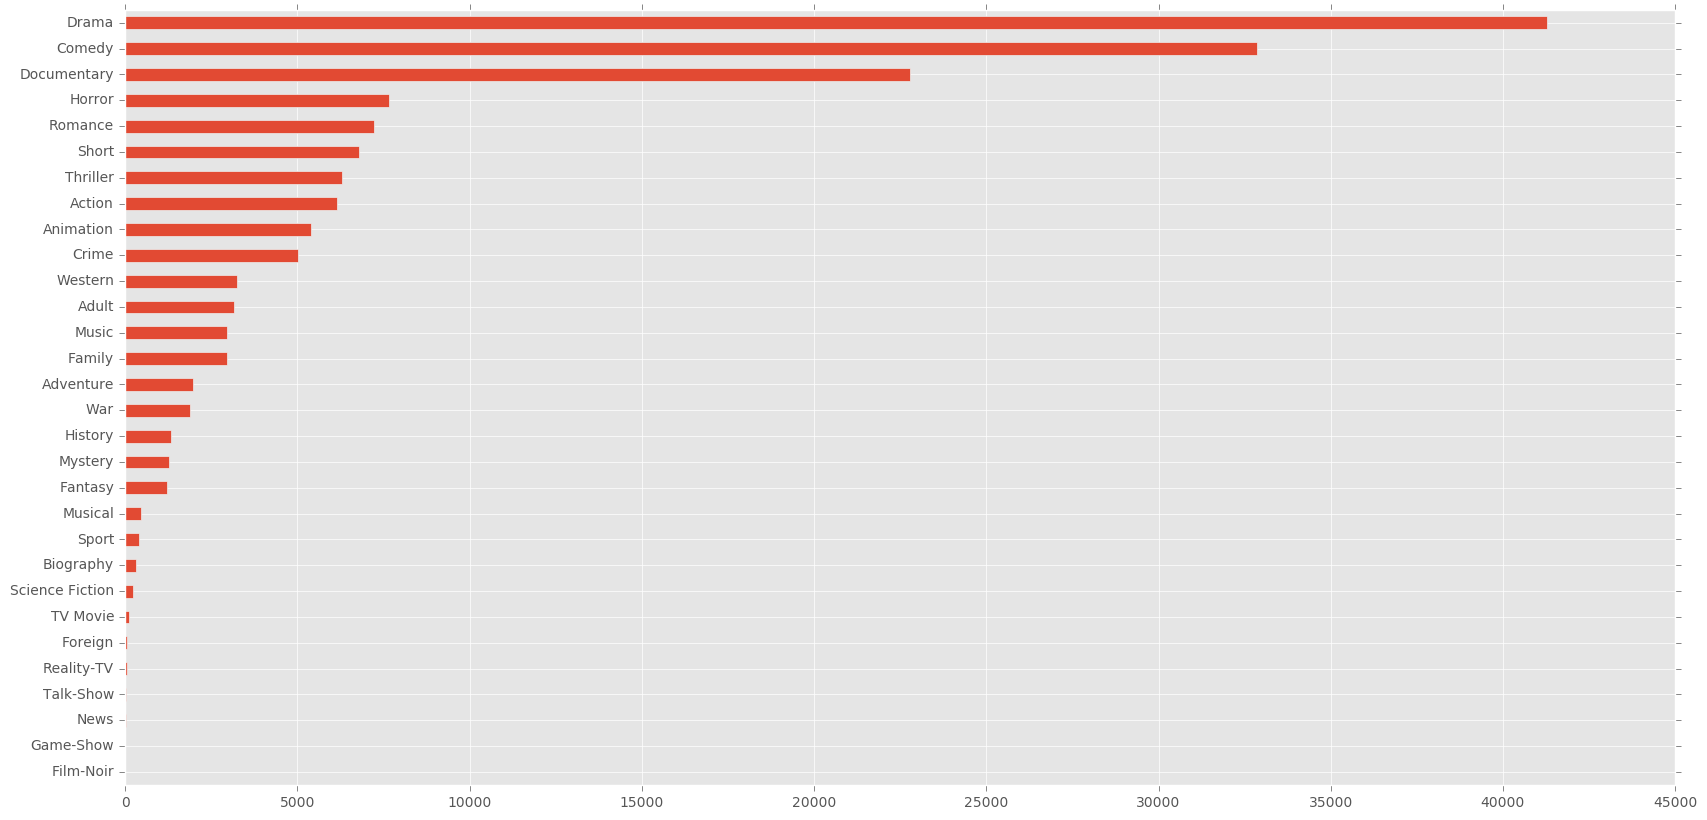

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize = (20,10))
df['merged_genre_clean'].value_counts()[:30].plot(kind = 'barh')
plt.gca().invert_yaxis()